In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import os
import math
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from SpatialTemporal_Correlation_and_Convolution import STcorrelate
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from SpatialTemporal_Correlation_and_Convolution import STconvolve

importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb


# C-H-R

In [3]:
dt = 0.001 #s
I = np.zeros(int(6/dt))
I[int(2/dt):int(4/dt)]= 0.26#R/s
T = np.arange(len(I))*dt

In [4]:
#Cone
C_tau_y = 0.043 #s
C_tau_z = 0.45 #s
gamma = 0.64
Ttemp = np.arange(0,int(C_tau_y/dt*15))*dt
C_Ky = Ttemp/C_tau_y /C_tau_y *np.exp(-Ttemp/C_tau_y)
Ttemp = np.arange(0,int(min(C_tau_z/dt*8,len(I)/2)))*dt
C_Kz = gamma*Ttemp/C_tau_y /C_tau_y *np.exp(-Ttemp/C_tau_y)+(1-gamma)*Ttemp/C_tau_z /C_tau_z *np.exp(-Ttemp/C_tau_z)

#Rod
R_tau_y = 0.017 #s
R_tau_w = 0.26 #s
Ttemp = np.arange(0,int(R_tau_y/dt*15))*dt
R_Ky = Ttemp/R_tau_y /R_tau_y *np.exp(-Ttemp/R_tau_y)
R_Kz = R_Ky.copy()
Ttemp = np.arange(0,int(min(R_tau_w/dt*8,len(I)/2)))*dt
R_Kw = Ttemp/R_tau_w /R_tau_w *np.exp(-Ttemp/R_tau_w)

In [5]:
def TemporalKernelInput(I, K, dt):
    nK = np.append(np.zeros(len(K)-1),K)
    if len(nK) > len(I):
        print('input too short')
        return np.nan
    else:
        return np.convolve(I, nK, 'same')*dt

I_yC = TemporalKernelInput(I, C_Ky, dt)
I_zC = TemporalKernelInput(I, C_Kz, dt)
I_yR = TemporalKernelInput(I, R_Ky, dt)
I_zR = TemporalKernelInput(I, R_Kz, dt)
I_wR = TemporalKernelInput(I, R_Kw, dt)

In [11]:
C_tau = 0.024#s
R_tau = 0.6#s
H_tau = 0.300#s
C_alpha = -8.8e-6*100 #s/R*
C_bata = 1.2e-5*100 #s/R*
R_alpha = -3.9e-3*500 #s/R*
R_bata = 3.9e-3*500 #s/R*
delta = 2.9e-5 #s/R*
H_alpha = 80 #1/R*
H_bata = -2.8 #1/R*

cone = np.zeros_like(I)
coneincreasing = np.zeros_like(I)
rod = np.zeros_like(I)
purod = np.zeros_like(I)
horizontal = np.zeros_like(I)
for i in range(len(I)):
    cone[i] = cone[i-1]+dt/C_tau*(C_alpha*I_yC[i]-(1+C_bata*I_zC[i])*cone[i-1])
    horizontal[i] = horizontal[i-1]+dt/H_tau*(H_alpha*cone[i]-(1+H_bata*cone[i])*horizontal[i-1])
    rod[i] = rod[i-1]+dt/R_tau*(R_alpha*I_yR[i]-(1+R_bata*I_zR[i])*(rod[i-1]+horizontal[i]))/(1+delta*I_wR[i])
    purod[i] = purod[i-1]+dt/R_tau*(R_alpha*I_yR[i]-(1+R_bata*I_zR[i])*purod[i-1])/(1+delta*I_wR[i])

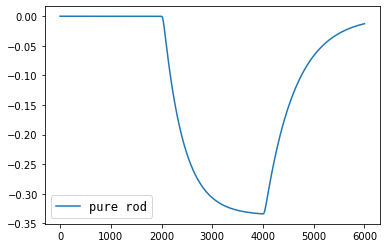

In [12]:
# plt.plot(cone, label = 'cone')
# plt.plot(horizontal, label = 'horizontal')
# plt.plot(rod, label = 'rod')
plt.plot(purod, label = 'pure rod')
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

In [8]:
# plt.plot(cone_1090, label = '1090')
# plt.plot(cone_110, label = '110')
# plt.plot(cone_13, label = '13')
# plt.plot(cone_1p5, label = '1.5')
# plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

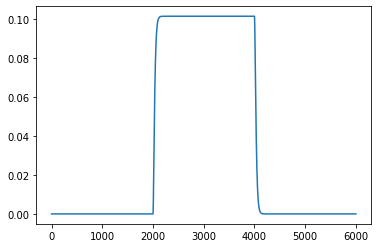

In [9]:
plt.plot(R_bata*I_zR)

In [10]:
R_bata*I_zR[i]

0.0

# Rod

In [56]:
dt = 0.001 #s
I = np.zeros(int(6/dt))
I[int(2/dt):int(4/dt)]= 1#R/s
T = np.arange(len(I))*dt

#Rod
R_tau_y = 0.017 #s
R_tau_w = 0.26 #s
Ttemp = np.arange(0,int(R_tau_y/dt*15))*dt
R_Ky = Ttemp/R_tau_y /R_tau_y *np.exp(-Ttemp/R_tau_y)
R_Kz = R_Ky.copy()
Ttemp = np.arange(0,int(min(R_tau_w/dt*8,len(I)/2)))*dt
R_Kw = Ttemp/R_tau_w /R_tau_w *np.exp(-Ttemp/R_tau_w)

def TemporalKernelInput(I, K, dt):
    nK = np.append(np.zeros(len(K)-1),K)
    if len(nK) > len(I):
        print('input too short')
        return np.nan
    else:
        return np.convolve(I, nK, 'same')*dt

I_yR0 = TemporalKernelInput(I, R_Ky, dt)
I_zR0 = TemporalKernelInput(I, R_Kz, dt)
I_wR0 = TemporalKernelInput(I, R_Kw, dt)

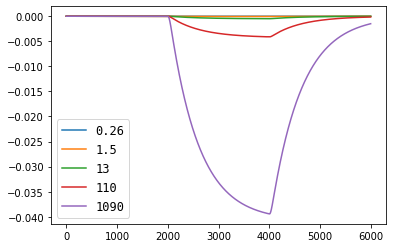

In [73]:
MAG = 0.01
R_tau = 0.6#s
R_alpha = -3.9e-3*MAG #s/R*
R_bata = 3.9e-3*MAG #s/R*
delta = 2.9e-5*MAG #s/R*

cmag = []
for lumin in [0.26, 1.5, 13, 110, 1090]:
    I_yR = I_yR0*lumin
    I_zR = I_yR0*lumin
    I_wR = I_yR0*lumin
    purod = np.zeros_like(I)
    for i in range(len(I)):
        purod[i] = purod[i-1]+dt/R_tau/(1+delta*I_wR[i])*(R_alpha*I_yR[i]-(1+R_bata*I_zR[i])*purod[i-1])
    plt.plot(purod, label=str(lumin))
    cmag.append(min(purod))
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

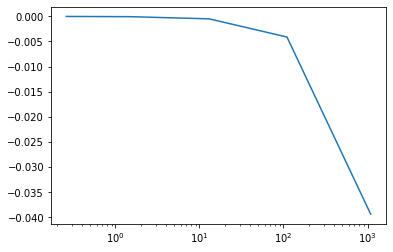

In [74]:
plt.plot([0.26, 1.5, 13, 110, 1090], cmag)
plt.xscale('log')

# Cone

In [46]:
dt = 0.001 #s
I = np.zeros(int(6/dt))
I[int(2/dt):int(4/dt)]= 1#R/s
T = np.arange(len(I))*dt

#Cone
C_tau_y = 0.043 #s
C_tau_z = 0.45 #s
gamma = 0.64
Ttemp = np.arange(0,int(C_tau_y/dt*15))*dt
C_Ky = Ttemp/C_tau_y /C_tau_y *np.exp(-Ttemp/C_tau_y)
Ttemp = np.arange(0,int(min(C_tau_z/dt*8,len(I)/2)))*dt
C_Kz = gamma*Ttemp/C_tau_y /C_tau_y *np.exp(-Ttemp/C_tau_y)+(1-gamma)*Ttemp/C_tau_z /C_tau_z *np.exp(-Ttemp/C_tau_z)

def TemporalKernelInput(I, K, dt):
    nK = np.append(np.zeros(len(K)-1),K)
    if len(nK) > len(I):
        print('input too short')
        return np.nan
    else:
        return np.convolve(I, nK, 'same')*dt

I_yC0 = TemporalKernelInput(I, C_Ky, dt)
I_zC0 = TemporalKernelInput(I, C_Kz, dt)

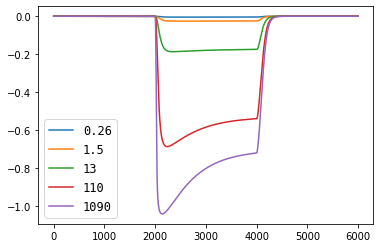

In [53]:
MAG = 2000
C_tau = 0.024#s
C_alpha = -8.8e-6*MAG #s/R*
C_bata = 1.2e-5*MAG #s/R*


for lumin in [0.26, 1.5, 13, 110, 1090]:
    I_yC = I_yC0*lumin
    I_zC = I_zC0*lumin
    cone = np.zeros_like(I)
    for i in range(len(I)):
        cone[i] = cone[i-1]+dt/C_tau*(C_alpha*I_yC[i]-(1+C_bata*I_zC[i])*cone[i-1])
    plt.plot(cone, label=str(lumin))
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})